In [1]:
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis
import matplotlib.pyplot as plt
import numpy as np

In [2]:
set_default()

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Matrix Multiplication as Linear and Non-Linear Transformations

Linear transformations can be described by a matrix by following $\hat{i}$ and $\hat{j}$

Matrices can be better understood as transformations of space: *linear transformations*. Here, "transformation" is a synonym of "function" and "linear" and has the following *visual* interpretation: moving around space such that grid lines remain parallel and evenly spaced, and such that the origin remains fixed. 

The following equation shows how a vector containing $x$ and $y$ is transformed when multiplied by a matrix. 

$$
\begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = 
x \begin{bmatrix} a \\ c \end{bmatrix} + y \begin{bmatrix} b \\ d \end{bmatrix} =
\begin{bmatrix} ax + by \\ cx + dy \end{bmatrix}
$$

That being said, linear transformations are just functions with vectors as inputs and vectors as outputs. 

Matrix multiplication can also be conceived as a **composition** of distinct transformations, for example:

$$
\underbrace{\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}}_\text{Shear} 
\underbrace{\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}}_\text{Rotation}
\begin{bmatrix} x \\ y \end{bmatrix} = 
\underbrace{\begin{bmatrix} 1 & -1 \\ 1 & 0 \end{bmatrix}}_\text{Composition} 
\begin{bmatrix} x \\ y \end{bmatrix}
$$

Before transformation tensor([ 1.1464, -1.3794])
After transformation tensor([-1.8240, -0.0039])


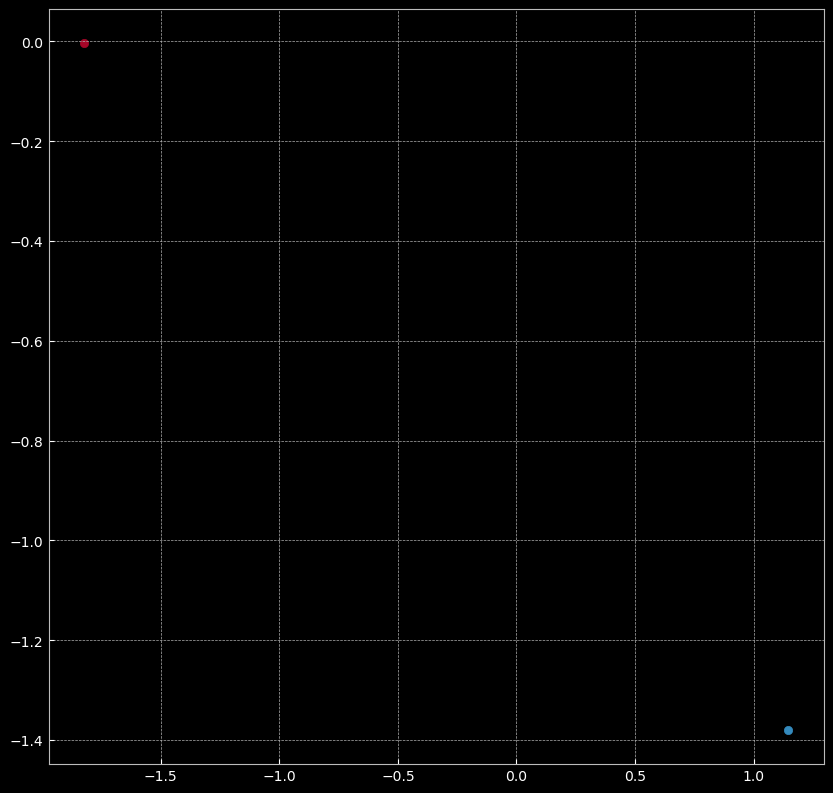

In [4]:
# Matrix-vector transformation
tensorA = torch.randn(2, 2) ## Matrix
tensorx = torch.randn(2) ## Vector
output = torch.matmul(tensorA, tensorx) ## Vector output

print('Before transformation', tensorx)
print('After transformation', output)

plt.scatter(tensorx[0], tensorx[1]) ## Before
plt.scatter(output[0], output[1]) ## After
plt.show()

tensor([[-0.1016,  1.3696],
        [-0.3053,  0.4404]])
tensor([[-1.8361,  0.0488],
        [ 0.2744, -0.4716]])
tensor([[ 0.5623, -0.6508],
        [ 0.6813, -0.2226]])


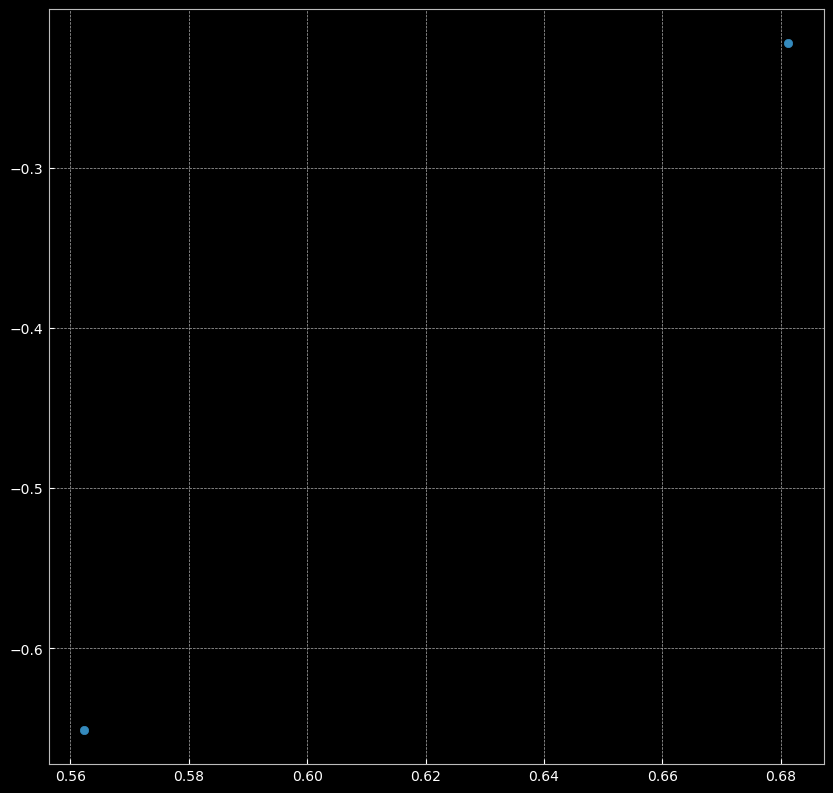

In [7]:
A = torch.randn(2, 2).to(device) 
B = torch.randn(2, 2).to(device)

# matrix-matrix multiplication can be done with "@"
AB = A @ B 

print(A)
print(B)
print(AB)

# Following basis vectors i and j in 2d space
plt.scatter(AB[:, 0], AB[:, 1])
plt.show()

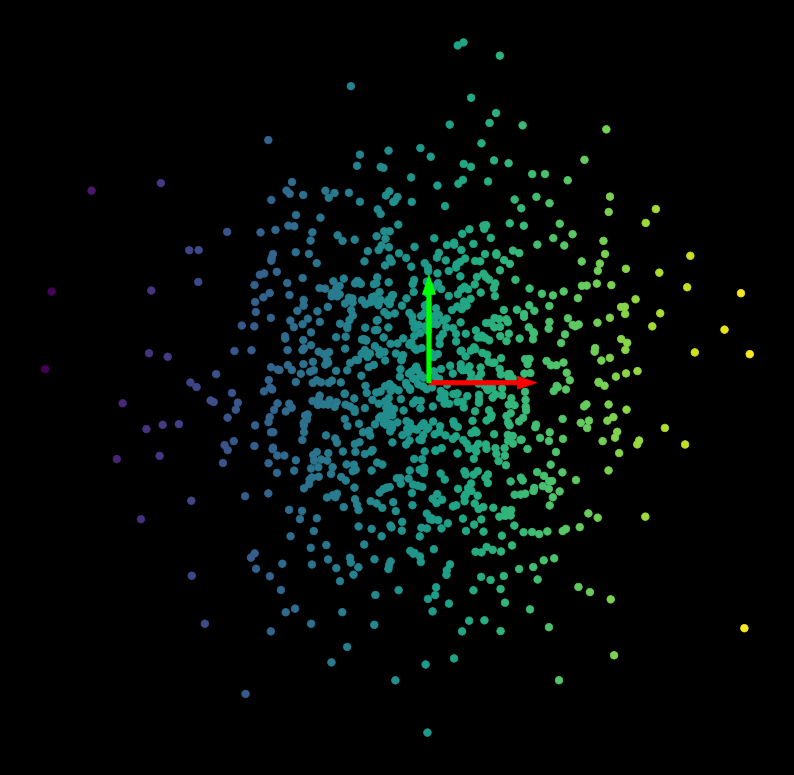

In [8]:
# generate some points in 2-D space
n_points = 1000

# Tensor with random number generation from Gaussian distribution - (1000, 2)
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

# Plotting random points
show_scatterplot(X, colors)
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)



## Visualizing Linear Transformations

 - Larger singular values stretch the points
 - Smaller (fractional) singular values squash them together
 - $U$, $V$ = rotatations / reflections
 - $S$ = squish or expand

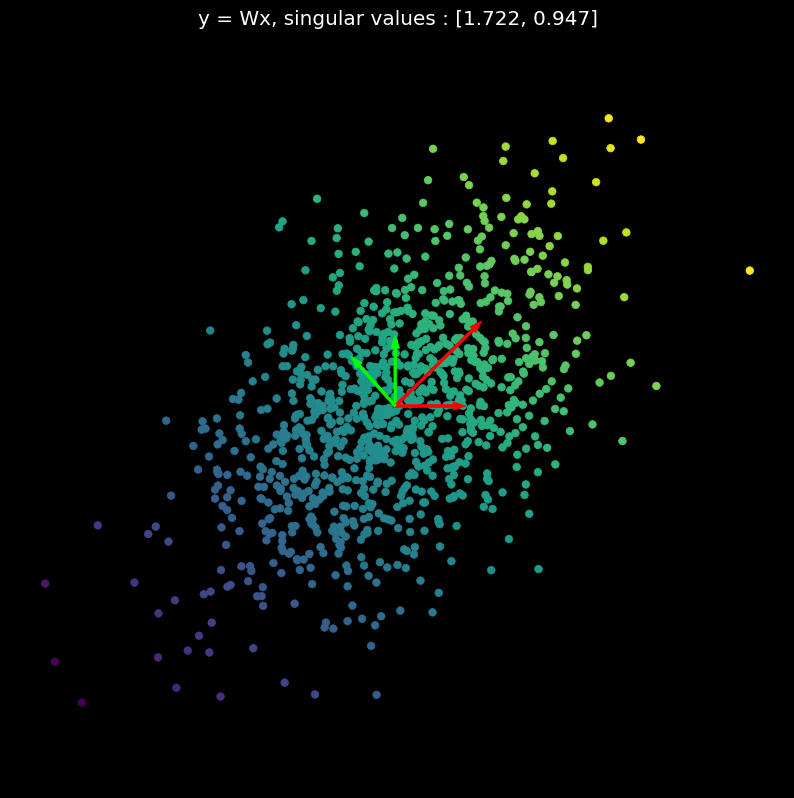

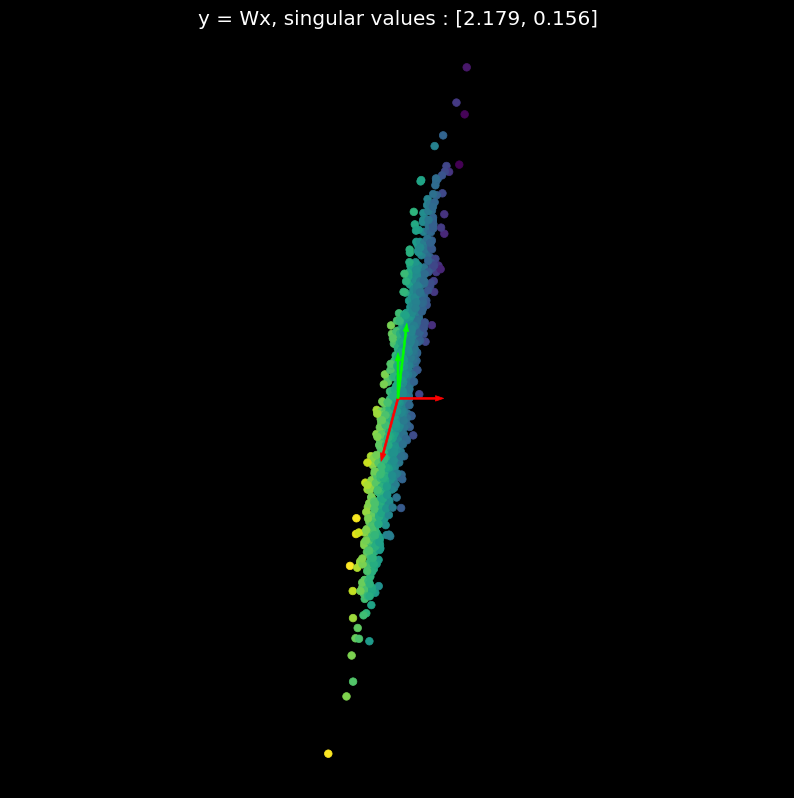

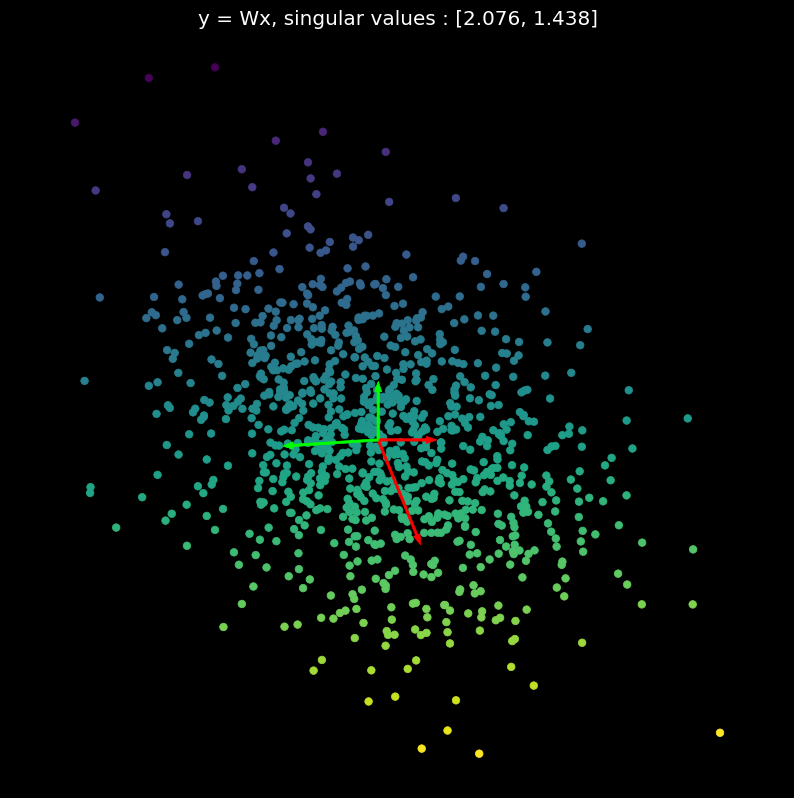

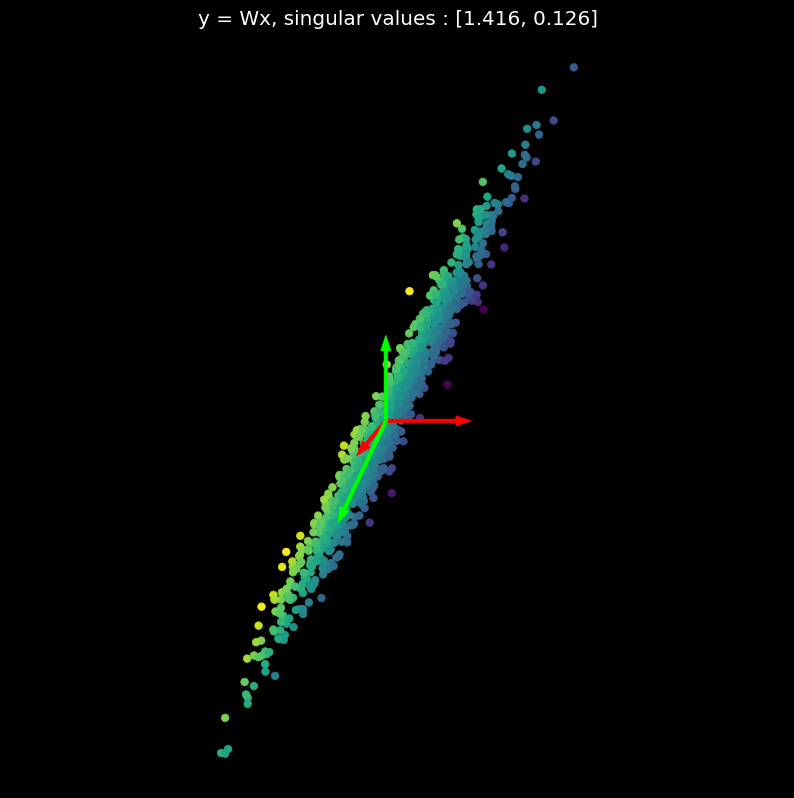

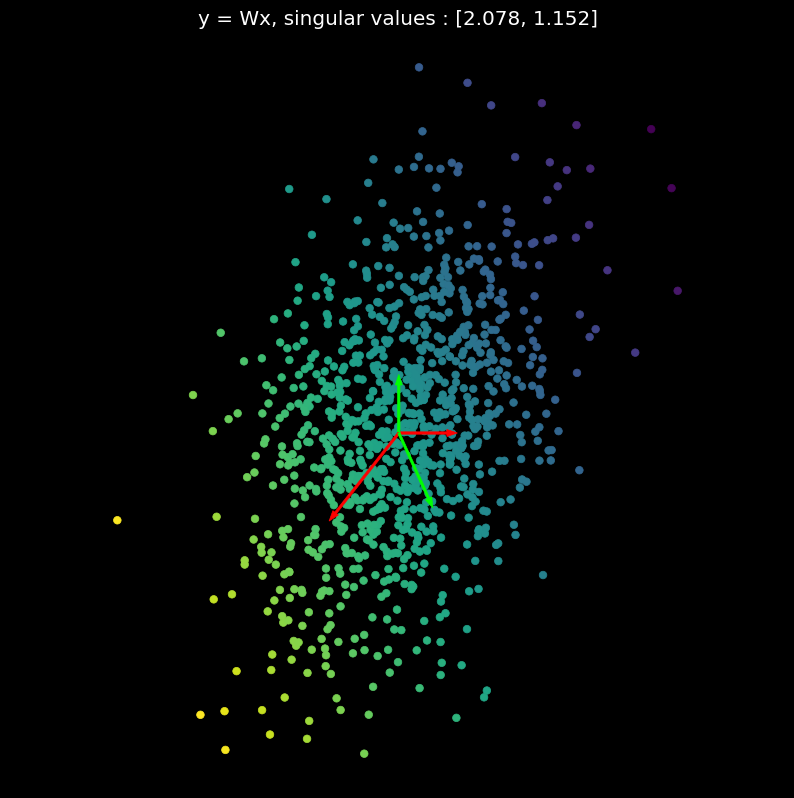

In [9]:
for i in range(5):
    # create a random matrix each iteration
    W = torch.randn(2, 2).to(device)
    # transform points - @ represents matrix multiplication in python
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis w/same operation used to transform the points
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)
    plot_bases(new_OI)

## Non-Linear Transformations

Linear transformations can rotate, reflect, scale, and squish space but **CAN'T** curve space. We need to introduce non-linear functions in order to do this; aka by using activation functions such as those used in NNs, we are imposing non-linearity on the data
 - I.e., We can map points to a square by first stretching out by a factor $s$, then squashing with a $tanh$ function

$$
f(x) = tanh\begin{pmatrix} \begin{bmatrix} s & 0 \\ 0 & s \end{bmatrix} x\end{pmatrix} 
$$

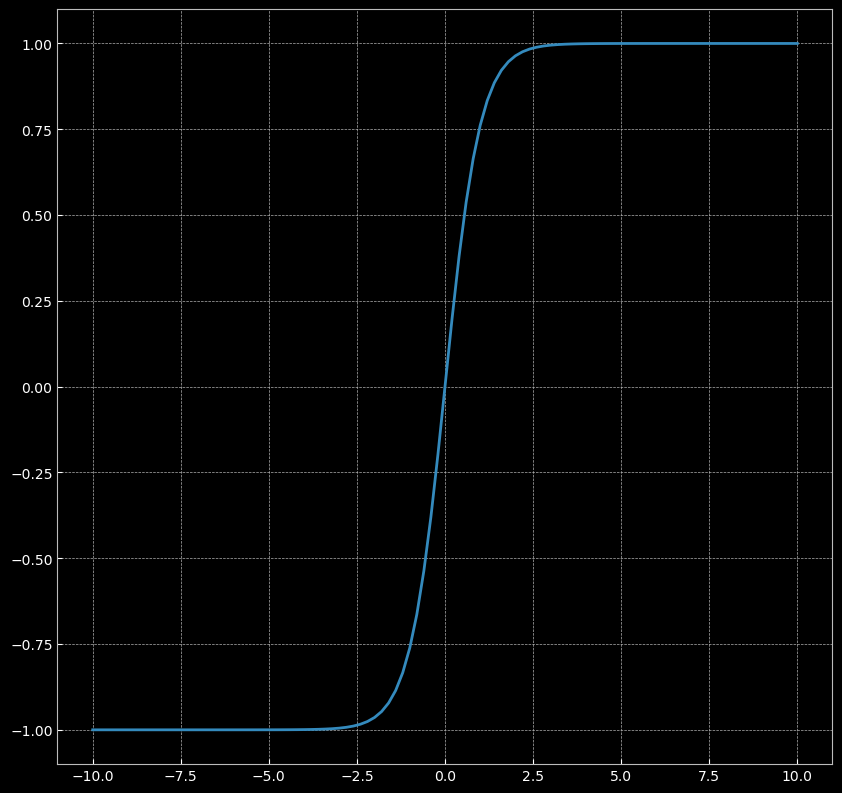

In [10]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())

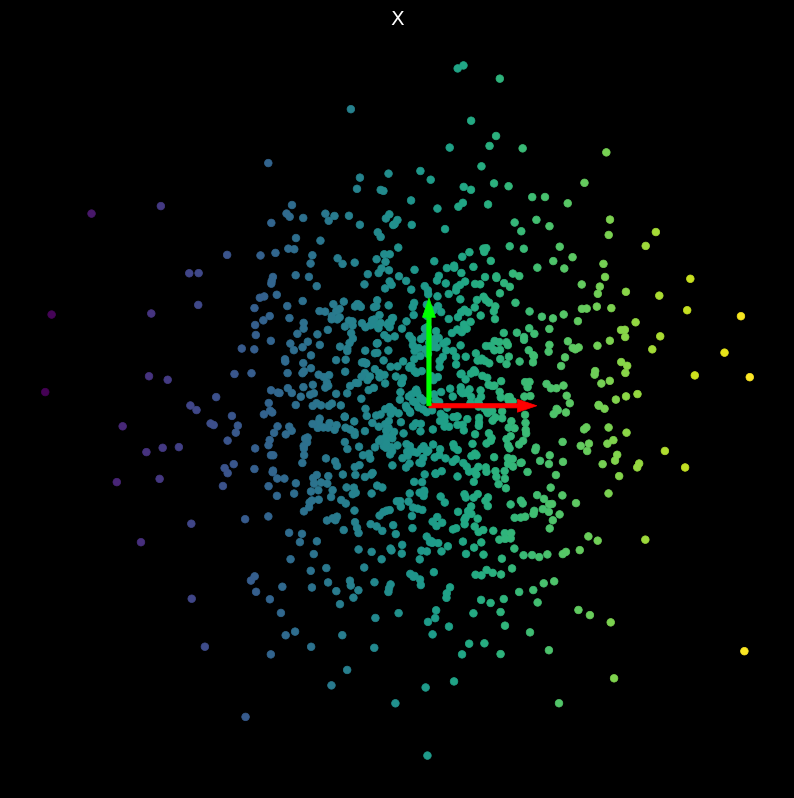

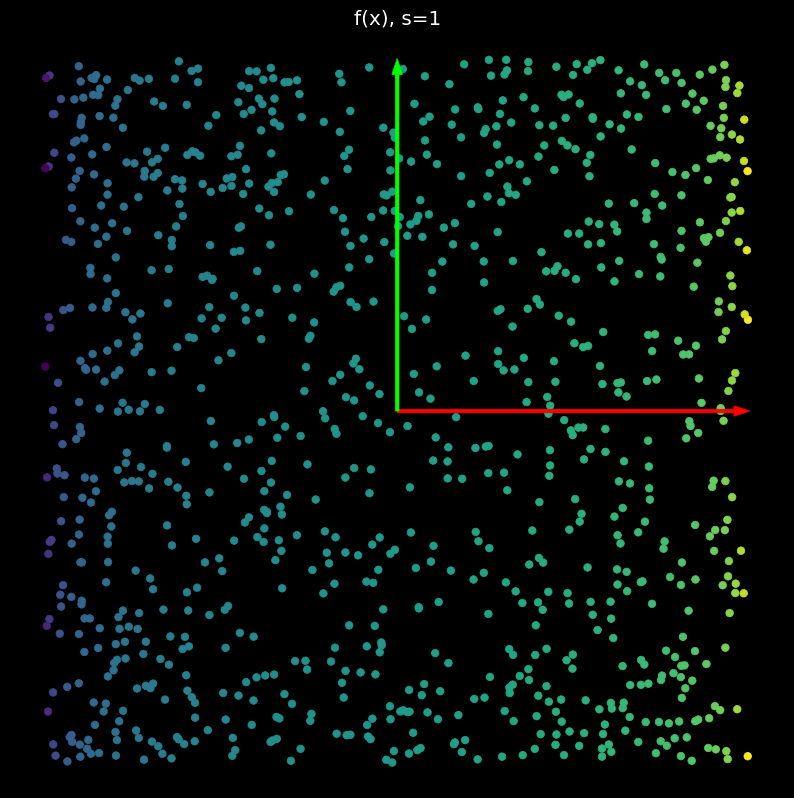

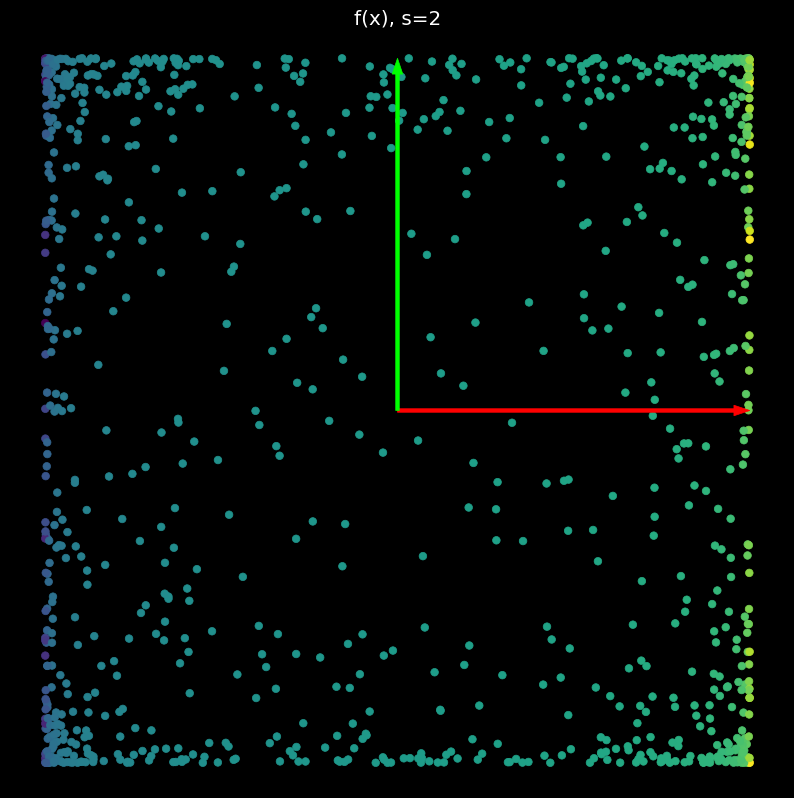

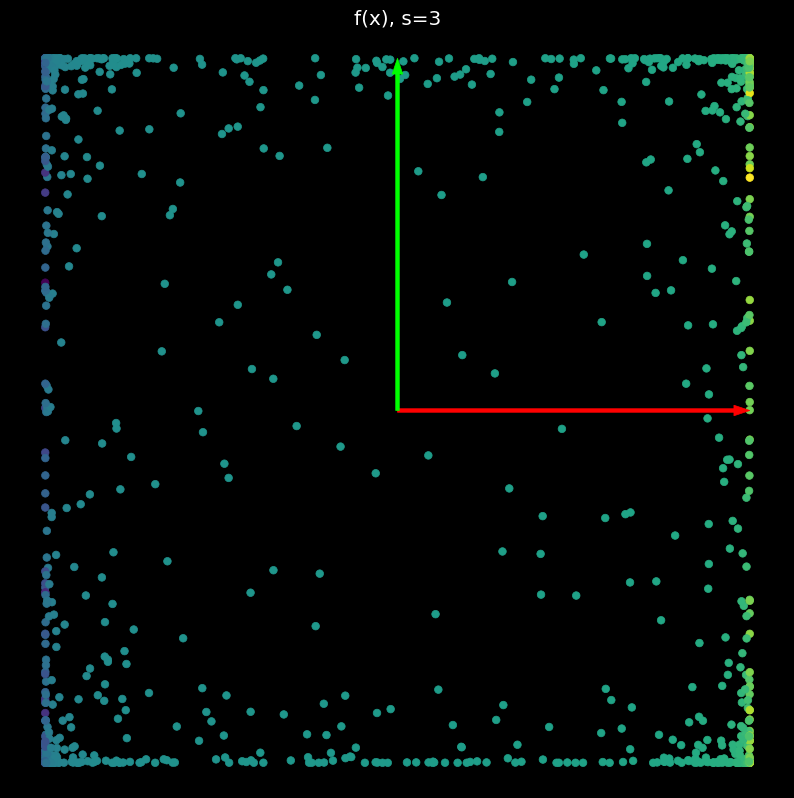

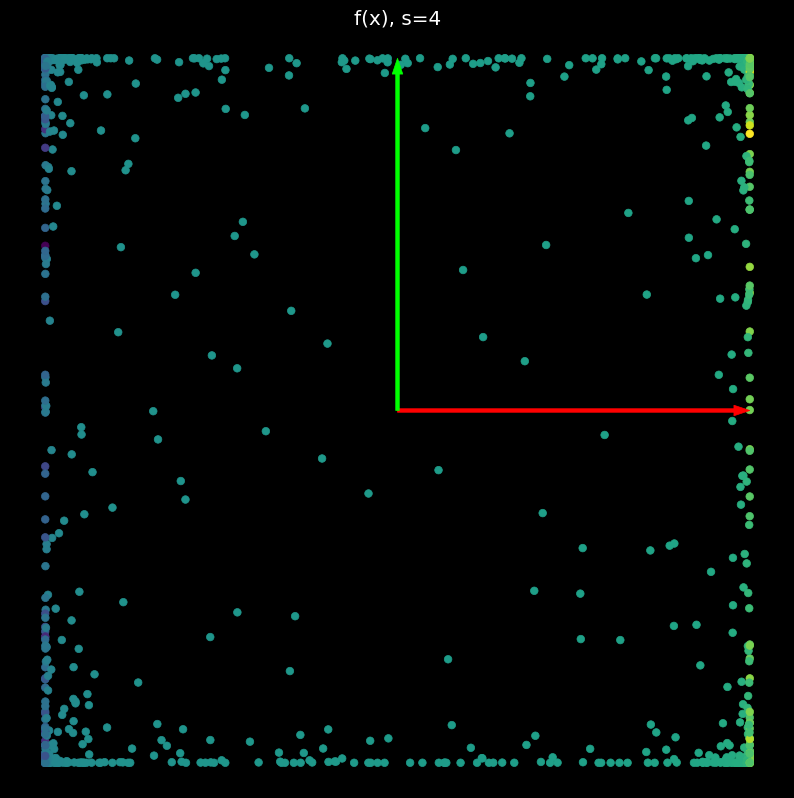

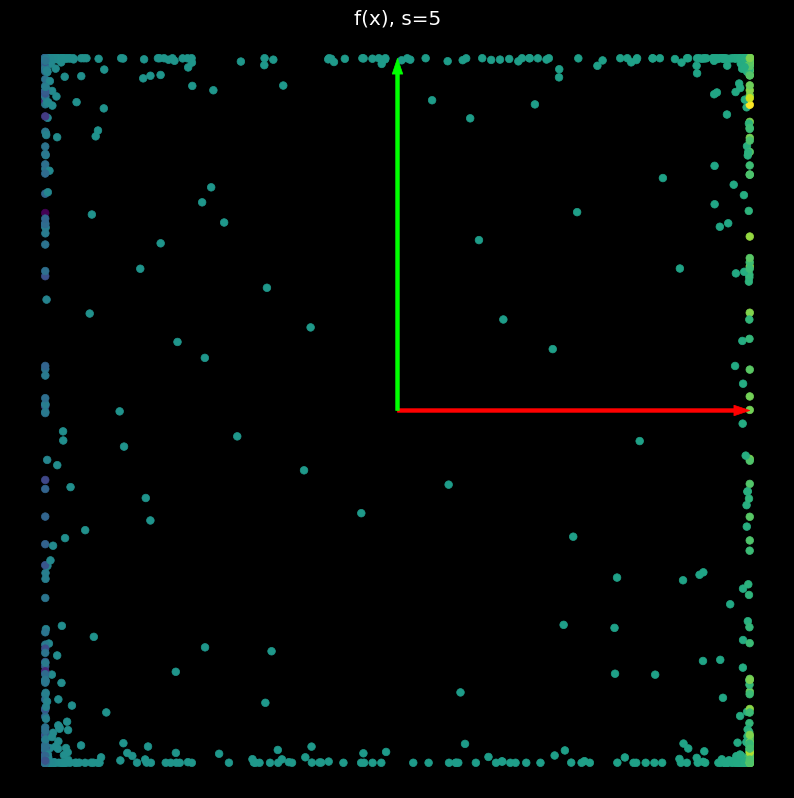

In [11]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False), ## 2 inputs and 2 outputs 
        nn.Tanh())

model.to(device)

for s in range(1, 6):
    # This is the W matrix and torch.eye() represents an identity matrix
    # By torch.eye() by s, it results in increased scalers (s) inside the matrix
    W = s * torch.eye(2)
    # First model will have 1 as scalars on diagonal
    model[0].weight.data.copy_(W)
    # Passing in data "X" into the model 
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

## Visualize Functions Represented by Neural Networks

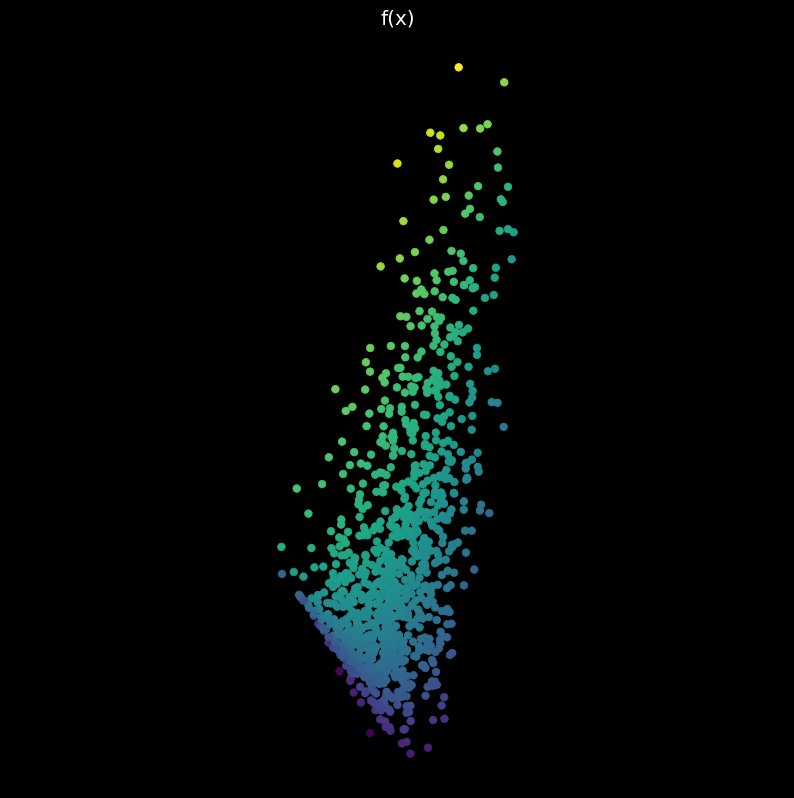

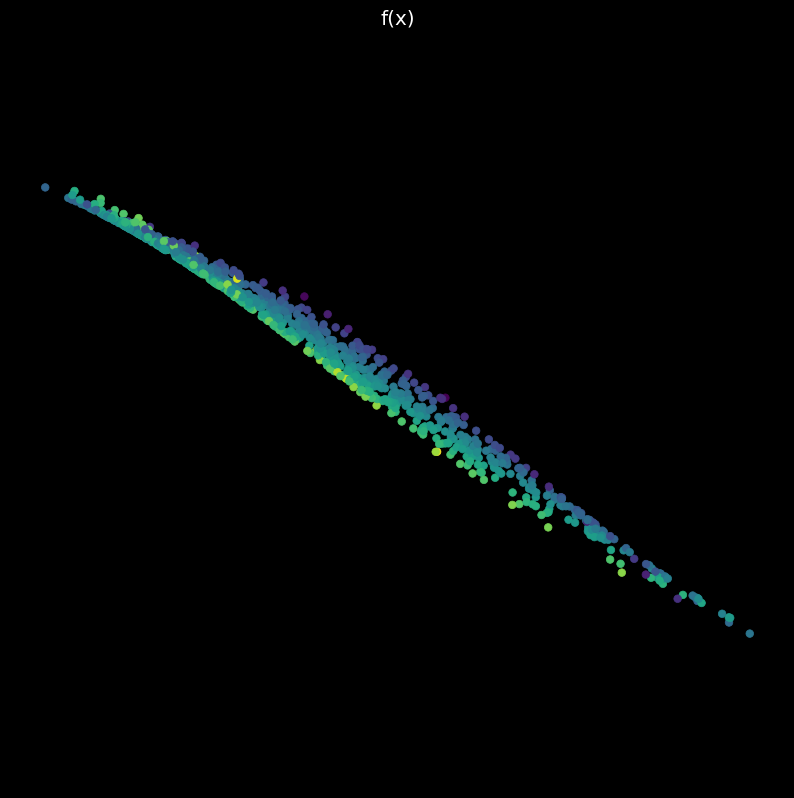

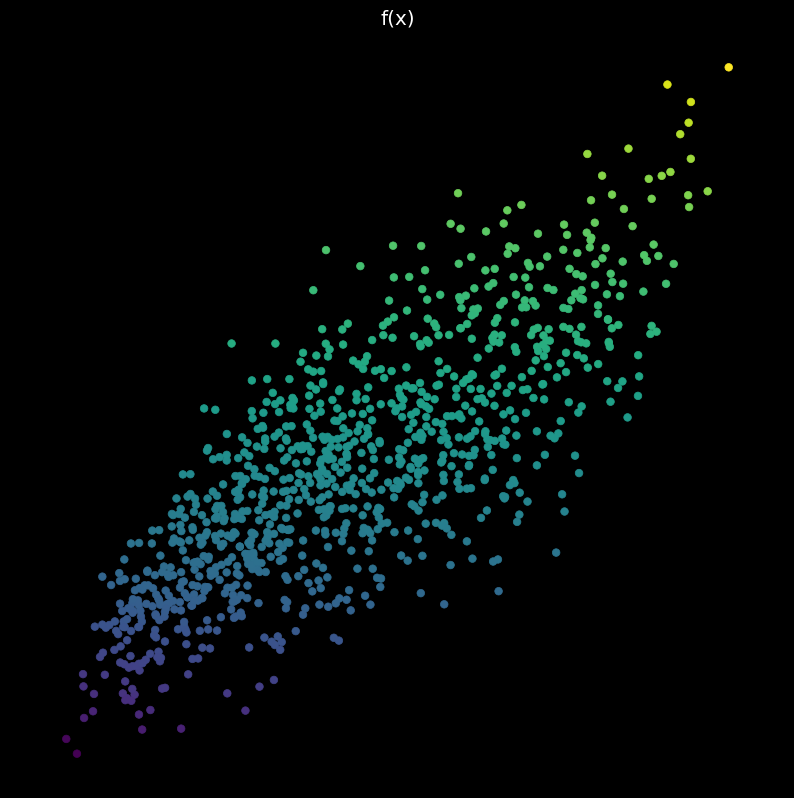

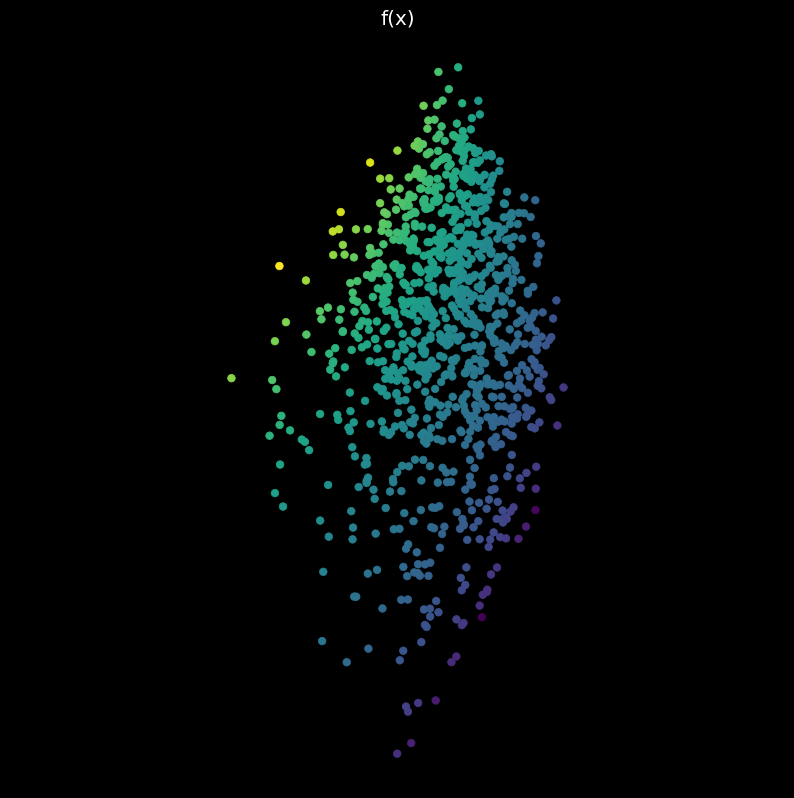

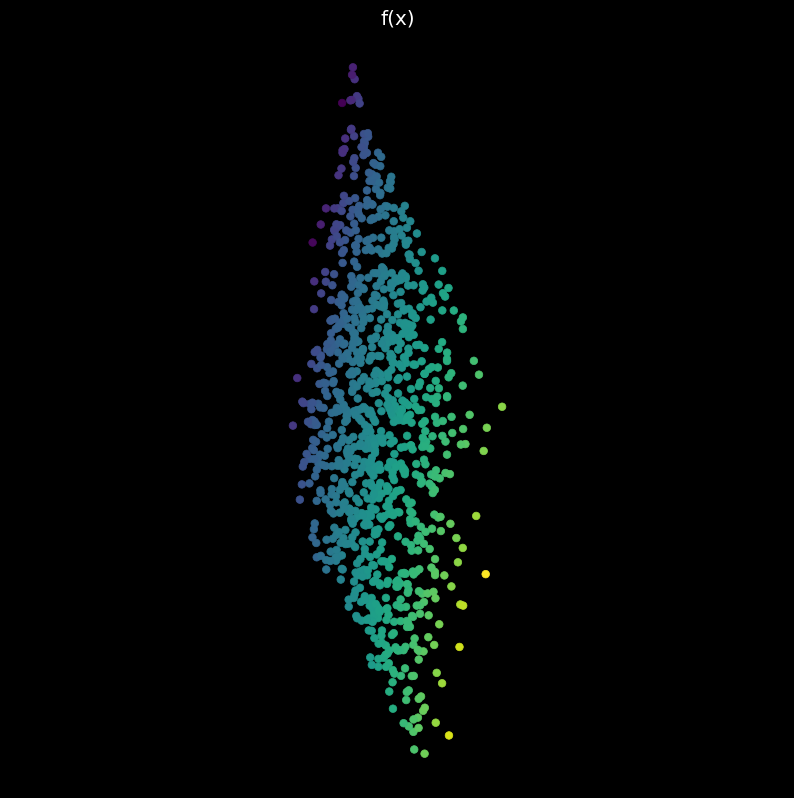

In [23]:
hidden_neurons = 5
activation_func = nn.Tanh()
#activation_func = nn.ReLu()

for i in range(5):
    # Create a one layer NN
    model = nn.Sequential(
            nn.Linear(2, hidden_neurons), ## 2 inputs go to hidden layer where there 5 neurons
            activation_func, ## Inputs get pushed through an activation function
            nn.Linear(hidden_neurons, 2)) ## Outputs from activation function are 2d
    #print(model)
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')

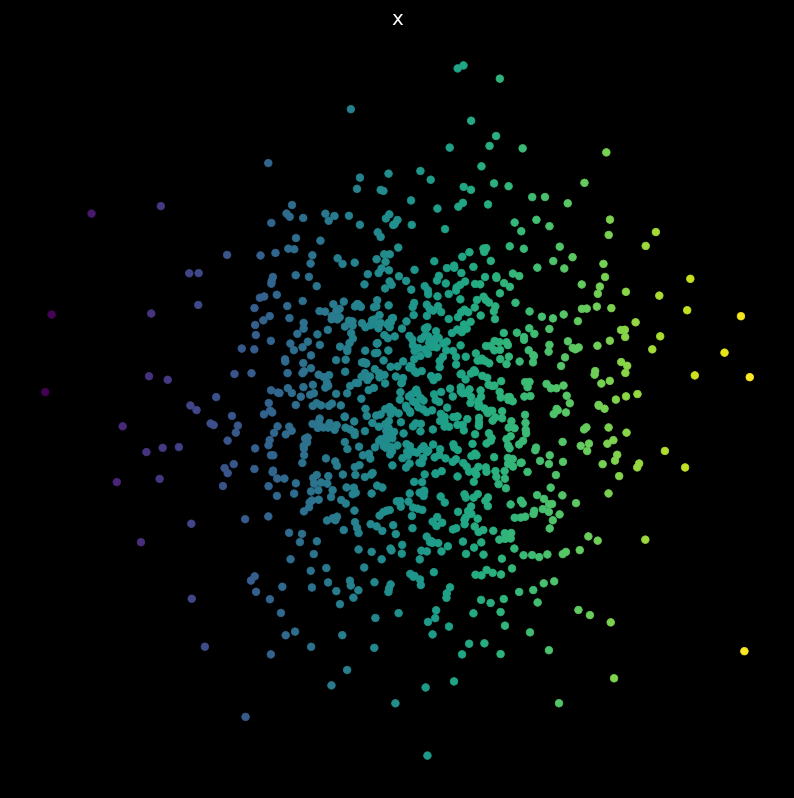

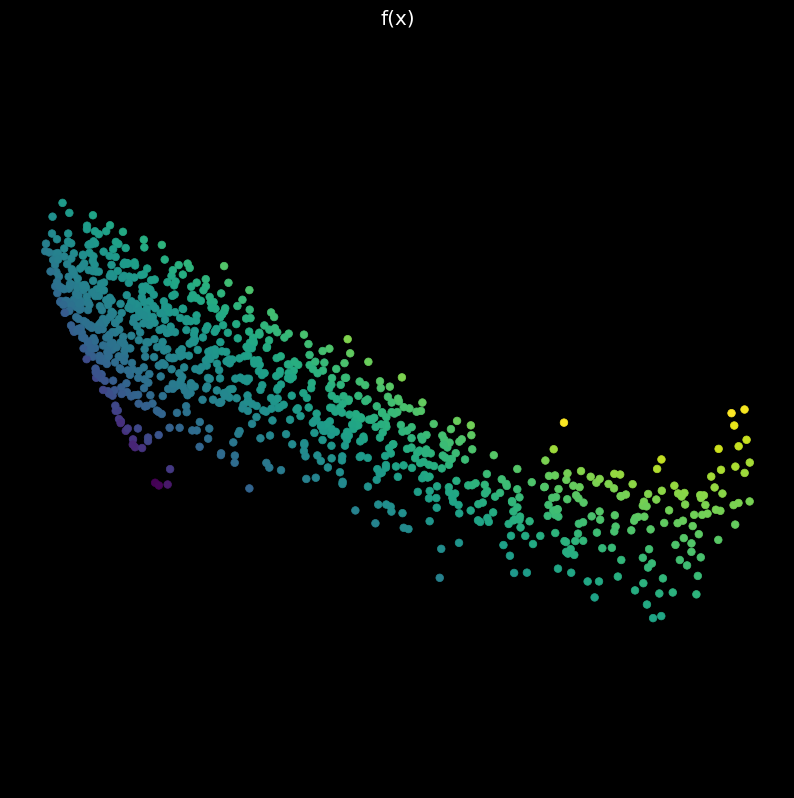

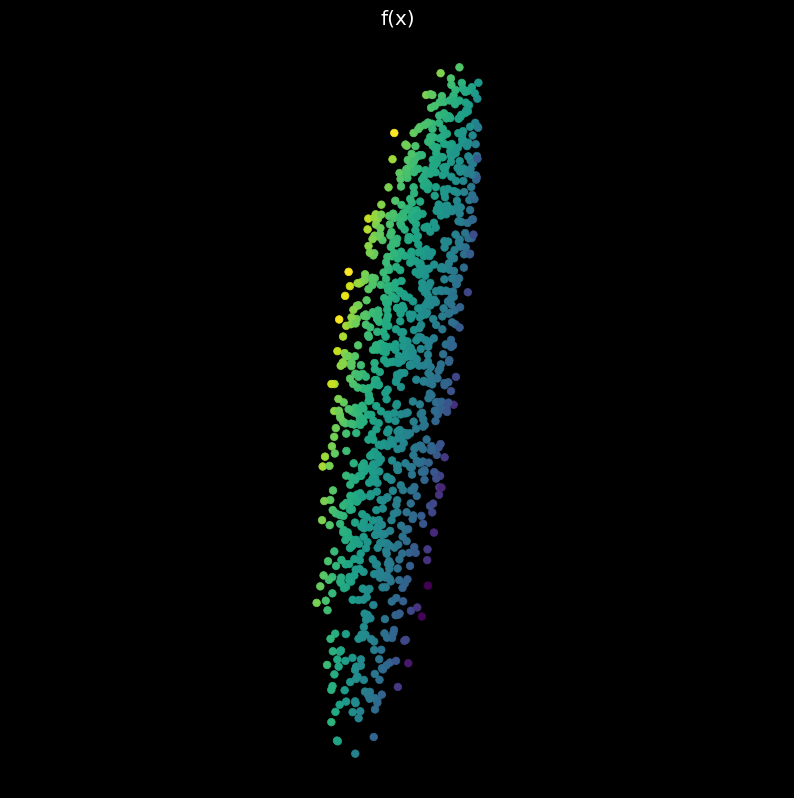

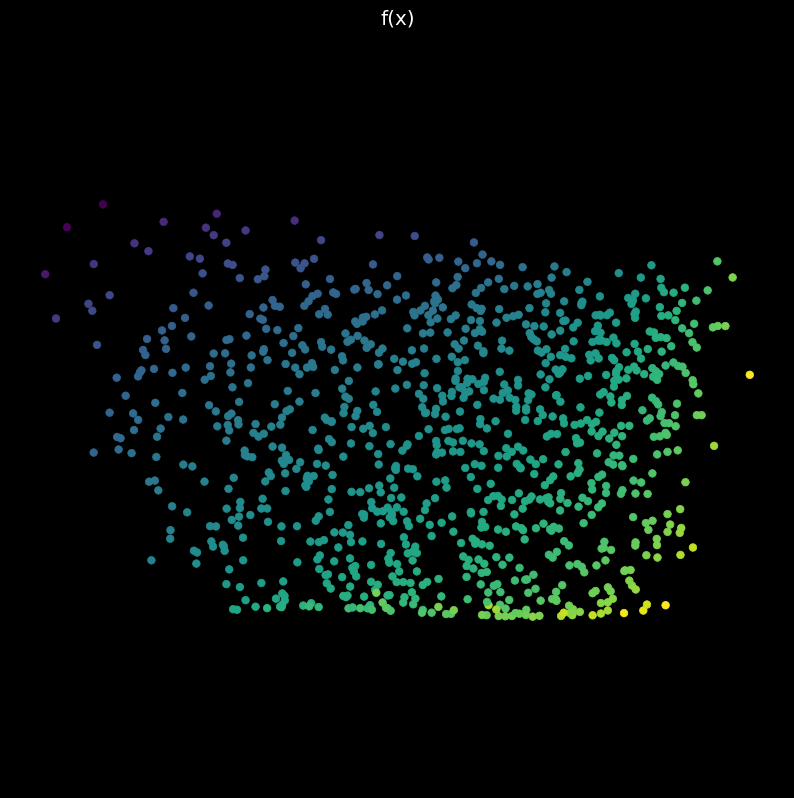

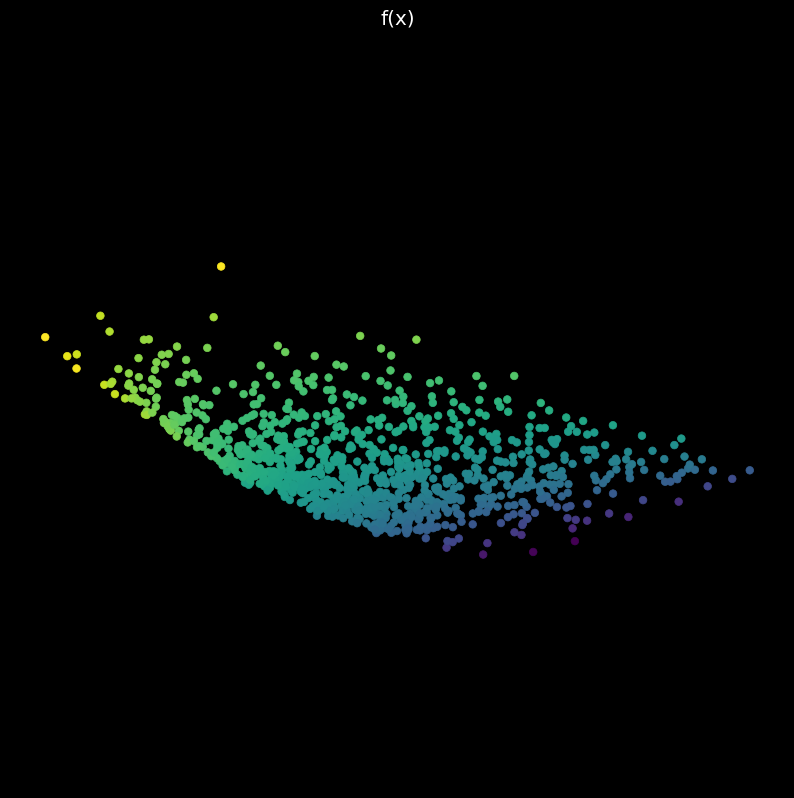

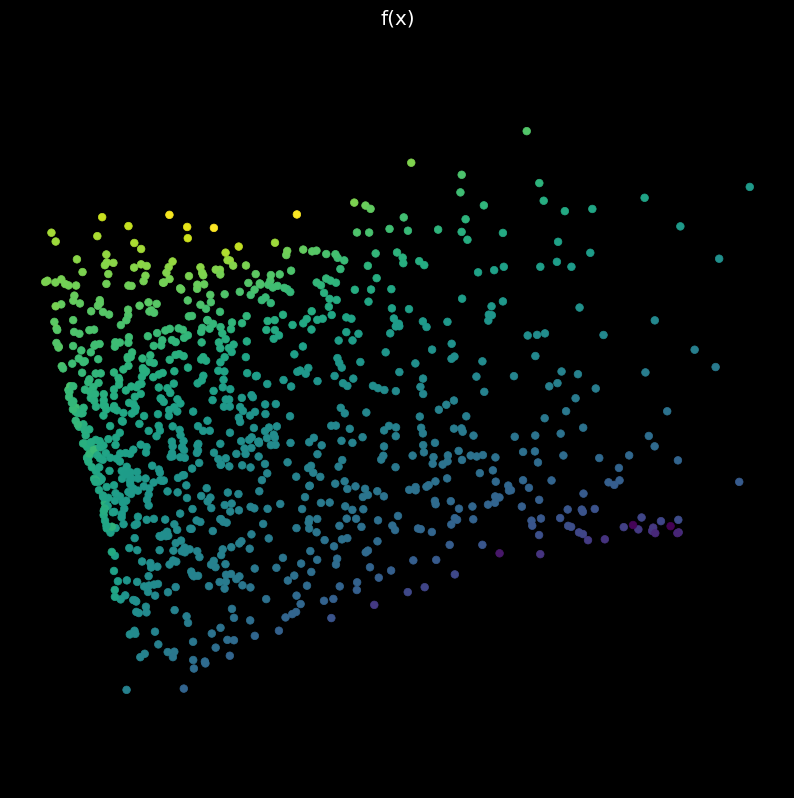

In [12]:
# Even deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')